### Đinh Thị Thanh Hằng - ITDSIU21083


In [6]:
#importing libraries
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import scipy.stats as stats
import seaborn as sns
df = pd.read_csv('CH01PR27.txt',sep= '\s+',header=None) # read the data set
df.columns = (['Muscle Mass','Age'])
df.head() # return top 10 values

,Muscle Mass,Age
0,106,43
1,106,41
2,97,47
3,113,46
4,96,45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60 non-null     int64
 1   1       60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [9]:
# naming variables
X = df['Muscle Mass']
Y = df['Age']

In [11]:
# sample nmean
X_bar = np.mean(X)
Y_bar = np.mean(Y)
print('X_mean =',X_bar)
print('Y_mean =',Y_bar)
# difference from mean
X_err = X - X_bar
Y_err = Y - Y_bar


X_mean = 84.96666666666667
Y_mean = 59.983333333333334


In [13]:
A = np.sum(X_err * Y_err)
B = np.sum(X_err ** 2)
print('A =',A)
print('B =',B)


A = -9771.033333333333
B = 15501.933333333334


In [14]:
b1 = A/B
b0 = Y_bar - b1 * X_bar
print('b1 =',b1)
print('b0 =',b0)

b1 = -0.6303106279216785
b0 = 113.53872635241194


In [15]:
Y_hat= b0 + b1*X
residual= Y- Y_hat

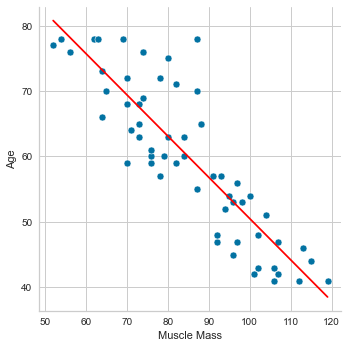

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(x='Muscle Mass', y='Age', data=df)
x = np.linspace(2000000, 5000000, 80000000)
sns.lineplot(x=X, y=b0+b1*X, color='red')
plt.show()


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# discuss the good fit of each model
model = smf.ols('Y ~ X', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           4.12e-19
Time:                        13:40:38   Log-Likelihood:                -191.11
No. Observations:                  60   AIC:                             386.2
Df Residuals:                      58   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.5387      4.131     27.483      0.000     105.269     121.808
X             -0.6303      0.048    -13.193      0.000      -0.726      -0.535
==============================================================================
Omnibus:                        7.187   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.337
Skew:                           0.739   Prob(JB):                       0.0421
Kurtosis:                       3.591   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# e
alpha = 0.05
n=len(X)
Y_hat=(b0+b1*60)
# caculate the MSE value
SSE= sum((Y-Y_hat)**2)
MSE= SSE/(n-2)
SSR = np.sum((Y_hat - Y_bar)**2)
SSTO = SSE + SSR
MSR = SSR
print(MSE,SSR,SSTO, MSR,SSE)

NameError: name 'y1' is not defined

In [37]:
std_dev = MSE / B
s = np.sqr
t(std_dev)
s

0.04777521099767076

In [38]:
t = stats.t.ppf(q=1-alpha/2, df = n-2)
t

2.0017174830120923

In [39]:
U = b1 + t*s
L = b1 - t*s
U,L

(-0.5346781528130493, -0.7259431030303076)

In [53]:
t1 = stats.t.ppf(q=1-0.02/2, df = n-2)
t1

2.3923774702828906

In [59]:
Y_hat1= b0+ b1*60
Y_hat1

75.72008867711124

In [70]:
Residual = Y - Y_hat1
SSE1 = np.sum(Residual**2)
MSE1 = SSE1/(n - 2)
MSE1

397.753645833253

In [60]:
Sxx = np.sum(X- X_bar)**2
Sxx

1.2924697071141057e-26

In [63]:
SYh = np.sqrt(MSE*(1/n + ((60 - X_bar)**2)/Sxx))
SYh

1306309011266142.5

In [64]:
U1 = Y_hat1+t1*SYh
L1 = Y_hat1-t1*SYh
print(L1,U1)


-3125184247780562.5 3125184247780713.5


In [67]:

# standard error of prediction
S_pred= np.sqrt(MSE*(1 + 1/n + ((60 - X_bar)**2)/Sxx))
S_pred

1306309011266142.5

In [69]:
# The following code calculates the predication interval.
L2= Y_hat1 - t1*S_pred
U2= Y_hat1 + t1*S_pred
L2,U2

(-3125184247780562.5, 3125184247780713.5)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd

In [32]:
#Breusch-Pagan test
# Fit the regression model
fit = smf.ols('X ~ Y', data=df).fit()
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
'f-value', 'f p-value']
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)


[('Lagrange multiplier statistic', 4.42210593733162),
 ('p-value', 0.03547622638008991),
 ('f-value', 4.61482300995483),
 ('f p-value', 0.03588513598042569)]

C:\Users\tanvu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


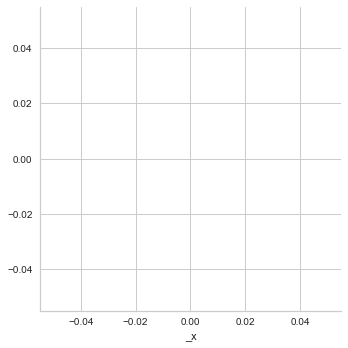

In [78]:
X1=np.array([0,1,2,3,4,5,6,7,8,9])
Y1=np.array([98,135,162,178,221,283,300,374,395])
import matplotlib.pyplot as plt
import seaborn as sns
# plotting the graph of the relationship between X1= total population and y=␣number of active physicans
sns.relplot(X1)
sns
x = np.linspace(2000000, 5000000, 80000000)
plt.show()